# Paper 1 - Ridge Regression

https://www.scirp.org/pdf/ojs_2021031710152209.pdf

dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [195]:
# import data set
import pandas as pd

source_file = 'winequality-white.csv'
data = pd.read_csv(source_file, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [196]:
# determine shape of dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [198]:
# check for null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = data.loc[:, data.columns != 'quality']
label = data['quality']

# paper used a train test ratio of 3:1
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=0)

# apply standardization
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [201]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [202]:
label.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [203]:
# Method from paper is ridge regression
# alpha from 0.00001 to 100 with an increment of 0.01
# alpha = 45.25

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

ridge = Ridge(alpha=45.25)
ridge.fit(x_train, y_train)

predictionTrain = ridge.predict(x_train)
trainMSE = mean_squared_error(y_train, predictionTrain)
trainMAPE = mean_absolute_percentage_error(y_train, predictionTrain)
trainR = math.sqrt(r2_score(y_train, predictionTrain))


predictionTest = ridge.predict(x_test)
testMSE = mean_squared_error(y_test, predictionTest)
testMAPE = mean_absolute_percentage_error(y_test, predictionTest)
testR = math.sqrt(r2_score(y_test, predictionTest))

print("using an alpha value of 45.25")
print("Training set R: {0}".format(trainR))
print("Training set MSE: {0}".format(trainMSE))
print("Training set MAPE: {0}".format(trainMAPE))
print()
print("Test set R: {0}".format(testR))
print("Test set MSE: {0}".format(testMSE))
print("Test set MAPE: {0}".format(testMAPE))


using an alpha value of 45.25
Training set MSE: 0.5434445670236645
Training set MAPE: 0.10042102212604749
Training set R: 0.5384447223073908

Test set MSE: 0.6279593689976659
Test set MAPE: 0.1128529708592877
Test set R: 0.499706089736728


In [204]:
# determining optimal alpha for for lowest MSE

alphas = []
MSEs = []

lowestMSE = None
lowestalpha = 0

alpha = 0.00001
while(alpha < 100):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    prediction = ridge.predict(x_test)
    mse = mean_squared_error(y_test, prediction)

    if(lowestMSE == None or mse < lowestMSE):
        lowestMSE = mse
        lowestalpha = alpha

    alphas.append(alpha)
    MSEs.append(mse)
    alpha = alpha + 0.01

print("lowest MSE was found to be {0} using an alpha value of {1}".format(lowestMSE, lowestalpha))

lowest MSE was found to be 0.6279313391826907 using an alpha value of 52.510009999998125


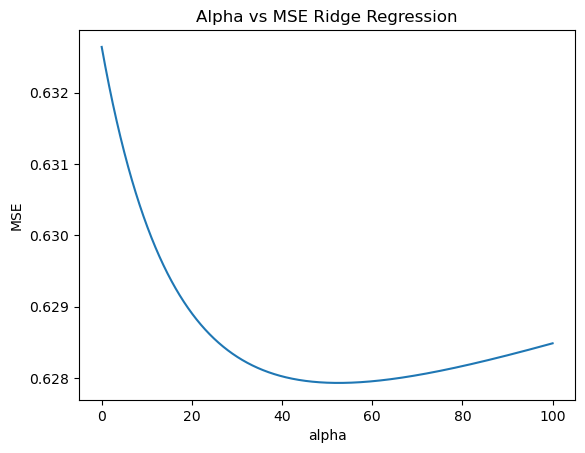

In [206]:
import matplotlib.pyplot as plt

plt.plot(alphas, MSEs)
plt.title('Alpha vs MSE Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()



# Modifications

In [231]:
source_file = 'winequality-white.csv'
data = pd.read_csv(source_file, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [232]:
features = data.loc[:, data.columns != 'quality']
label = data['quality']

# paper used a train test ratio of 3:1
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=0)

# apply standardization
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [233]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [234]:
label.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [241]:
# optimize for best alpha and solver

solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']

bestalpha = None
bestsolver = 'auto'
lowestMSE = None

for solver in solvers:
    alpha = 0.0001
    while(alpha < 100):
        positive = False
        if solver == 'lbfgs':
            positive = True
        ridge = Ridge(alpha=alpha, solver=solver, positive=positive)
        ridge.fit(x_train, y_train)
        prediction = ridge.predict(x_test)
        mse = mean_squared_error(y_test, prediction)

        if lowestMSE == None or lowestMSE > mse:
            bestalpha = alpha
            bestsolver = solver
            lowestMSE = mse
        
        alpha += 0.01

print("alpha used: {0}".format(bestalpha))
print("sovler used: {0}".format(bestsolver))
print("lowest MSE of test data: {0}".format(lowestMSE))

alpha used: 54.35009999999776
sovler used: sag
lowest MSE of test data: 0.6178883241859526


In [245]:
positive = False
if bestsolver == 'lbfgs':
    positive = True

ridge = Ridge(alpha=bestalpha, solver=bestsolver, positive=positive)
ridge.fit(x_train, y_train)

predictionTrain = ridge.predict(x_train)
trainMSE = mean_squared_error(y_train, predictionTrain)
trainMAPE = mean_absolute_percentage_error(y_train, predictionTrain)
trainR = math.sqrt(r2_score(y_train, predictionTrain))


predictionTest = ridge.predict(x_test) 
testMSE = mean_squared_error(y_test, predictionTest)
testMAPE = mean_absolute_percentage_error(y_test, predictionTest)
testR = math.sqrt(r2_score(y_test, predictionTest))

print("Training set R: {0}".format(trainR))
print("Training set MSE: {0}".format(trainMSE))
print("Training set MAPE: {0}".format(trainMAPE))
print()
print("Test set R: {0}".format(testR))
print("Test set MSE: {0}".format(testMSE))
print("Test set MAPE: {0}".format(testMAPE))

Training set R: 0.5493292933524468
Training set MSE: 0.5339430297870791
Training set MAPE: 0.09176264287976392

Test set R: 0.5108443879180466
Test set MSE: 0.6179273329003916
Test set MAPE: 0.10300365348072621


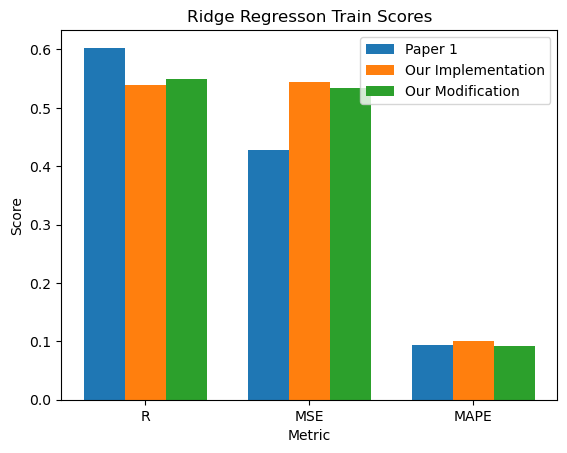

In [255]:
# lets graph the results of each of the different solvers
import numpy as np

metric_labels = ["R", "MSE", "MAPE"]
source_labels = ["Paper 1", "Our Implementation", "Our Modification"]
train_scores = np.array([[0.6029, 0.4281, 0.0934],[0.5384447223073908
, 0.5434445670236645, 0.10042102212604749],[0.5493292933524468, 0.5339430297870791, 0.09176264287976392]])

x = np.arange(len(metric_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_scores[0], width, label=source_labels[0])
rects2 = ax.bar(x, train_scores[1], width, label=source_labels[1])
rects3 = ax.bar(x + width, train_scores[2], width, label=source_labels[2])

ax.set_title('Ridge Regresson Train Scores')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(metric_labels, rotation=0)

plt.show()


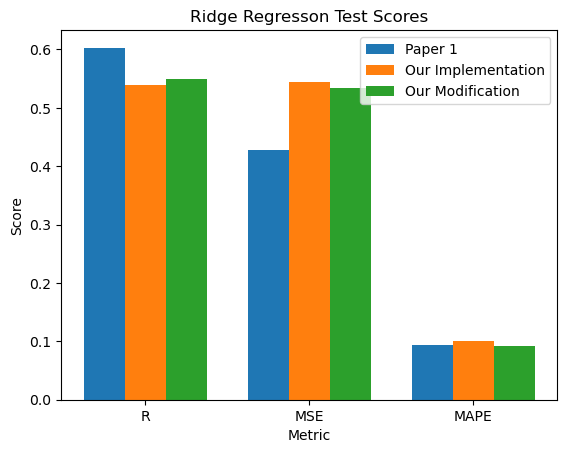

In [257]:
test_scores = np.array([[0.6029, 0.4281, 0.0934],[0.5384447223073908
, 0.5434445670236645, 0.10042102212604749],[0.5108443879180466, 0.6179273329003916, 0.10300365348072621]])

x = np.arange(len(metric_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_scores[0], width, label=source_labels[0])
rects2 = ax.bar(x, train_scores[1], width, label=source_labels[1])
rects3 = ax.bar(x + width, train_scores[2], width, label=source_labels[2])

ax.set_title('Ridge Regresson Test Scores')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(metric_labels, rotation=0)

plt.show()